In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train2.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(903653, 55)

In [5]:
df.sample(7)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,datasplit,campaign,...,language,screenColors,screenResolution,deviceCategory,criteriaParameters,page,slot,gclId,adNetworkType,isVideoAd
47995,Organic Search,20170111,9052251306982570939,9052251306982570939_1484169946,Not Socially Engaged,1484169946,2,1484169946,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
357689,Organic Search,20161027,2660321074902847791,2660321074902847791_1477571888,Not Socially Engaged,1477571888,1,1477571888,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
848497,Referral,20161231,4048523715129424339,4048523715129424339_1483183149,Not Socially Engaged,1483183149,1,1483183149,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
593981,Organic Search,20170720,7445235885559107095,7445235885559107095_1500562656,Not Socially Engaged,1500562656,98,1500562656,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
419086,Social,20161205,7657330241941478996,7657330241941478996_1480954439,Not Socially Engaged,1480954439,1,1480954439,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
260774,Referral,20170429,8166026685667862357,8166026685667862357_1493498454,Not Socially Engaged,1493498454,5,1493498454,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
888732,Direct,20160907,7037951125338805401,7037951125338805401_1473252429,Not Socially Engaged,1473252429,1,1473252460,train,(not set),...,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [6]:
df.isnull().sum()

channelGrouping                   0
date                              0
fullVisitorId                     0
sessionId                         0
socialEngagementType              0
visitId                           0
visitNumber                       0
visitStartTime                    0
datasplit                         0
campaign                          0
source                            0
medium                            0
keyword                      502929
isTrueDirect                 629648
referralPath                 572712
adContent                    892707
visits                            0
hits                              0
pageviews                       100
bounces                      453023
newVisits                    200593
transactionRevenue           892138
continent                         0
subContinent                      0
country                           0
region                            0
metro                             0
city                        

In [15]:
df.dtypes

channelGrouping               object
date                           int64
fullVisitorId                 object
sessionId                     object
socialEngagementType          object
visitId                        int64
visitNumber                    int64
visitStartTime                 int64
datasplit                     object
campaign                      object
source                        object
medium                        object
keyword                       object
isTrueDirect                  object
referralPath                  object
adContent                     object
visits                         int64
hits                           int64
pageviews                    float64
bounces                      float64
newVisits                    float64
transactionRevenue           float64
continent                     object
subContinent                  object
country                       object
region                        object
metro                         object
c

In [9]:
 df['continent'].value_counts().reset_index(name='count')[:10]

,index,count
0,Americas,450377
1,Asia,223698
2,Europe,198311
3,Oceania,15054
4,Africa,14745
5,(not set),1468


In [7]:
 df['country'].value_counts().reset_index(name='count')[:10]

,index,count
0,United States,364744
1,India,51140
2,United Kingdom,37393
3,Canada,25869
4,Vietnam,24598
5,Turkey,20522
6,Thailand,20123
7,Germany,19980
8,Brazil,19783
9,Japan,19731


In [8]:
df[df['continent']=='Americas']["country"].value_counts().reset_index(name='count')[:10]

,index,count
0,United States,364744
1,Canada,25869
2,Brazil,19783
3,Mexico,13225
4,Peru,5546
5,Argentina,5037
6,Colombia,4880
7,Venezuela,2132
8,Chile,1950
9,Ecuador,1251


In [11]:
def displayPiechart(columnName, df):
    data = df[columnName].value_counts()[:5]
    plt.figure(figsize=(20,10))
    data.plot(colormap='Paired',kind='pie',autopct='%1.2f%%')
    #data.plot(kind='pie',autopct='%1.2f%%')

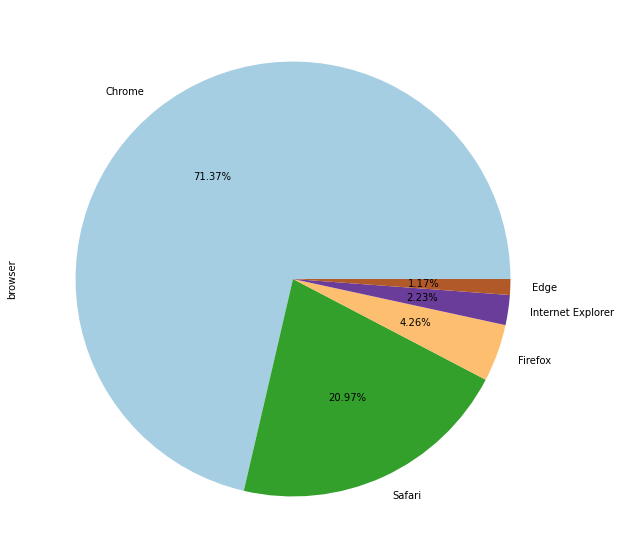

In [12]:
displayPiechart('browser',df)

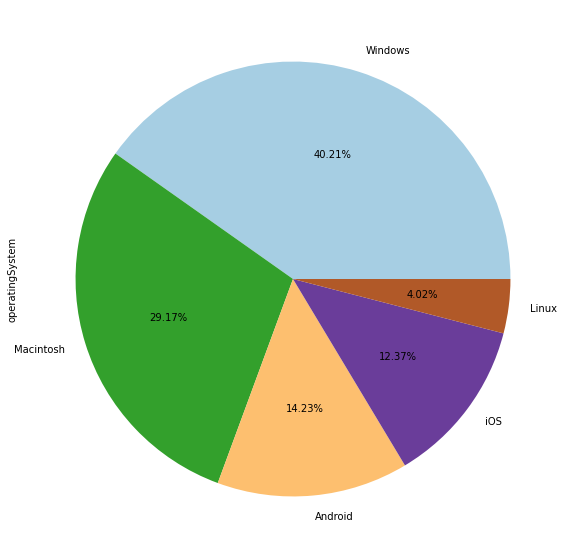

In [13]:
displayPiechart('operatingSystem',df)

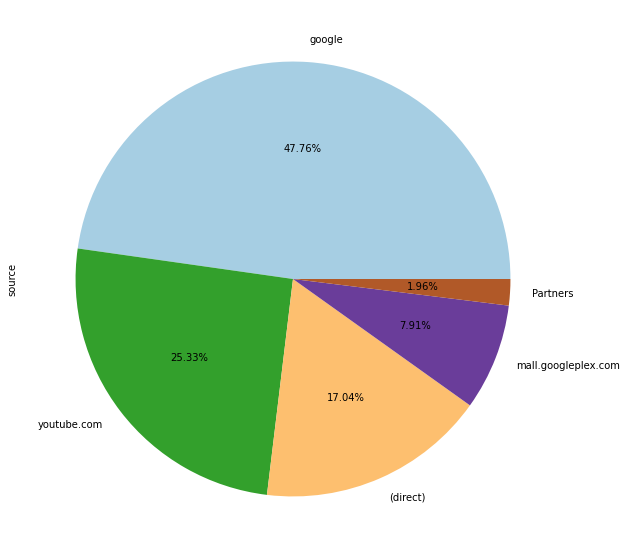

In [14]:
displayPiechart('source',df)

In [241]:
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df["month"] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.month
df['day_of_week'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.dayofweek
df['day'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.day

In [242]:
df['day_of_week']

0         4
1         4
2         4
3         4
4         4
         ..
903648    2
903649    2
903650    2
903651    2
903652    2
Name: day_of_week, Length: 903653, dtype: int64

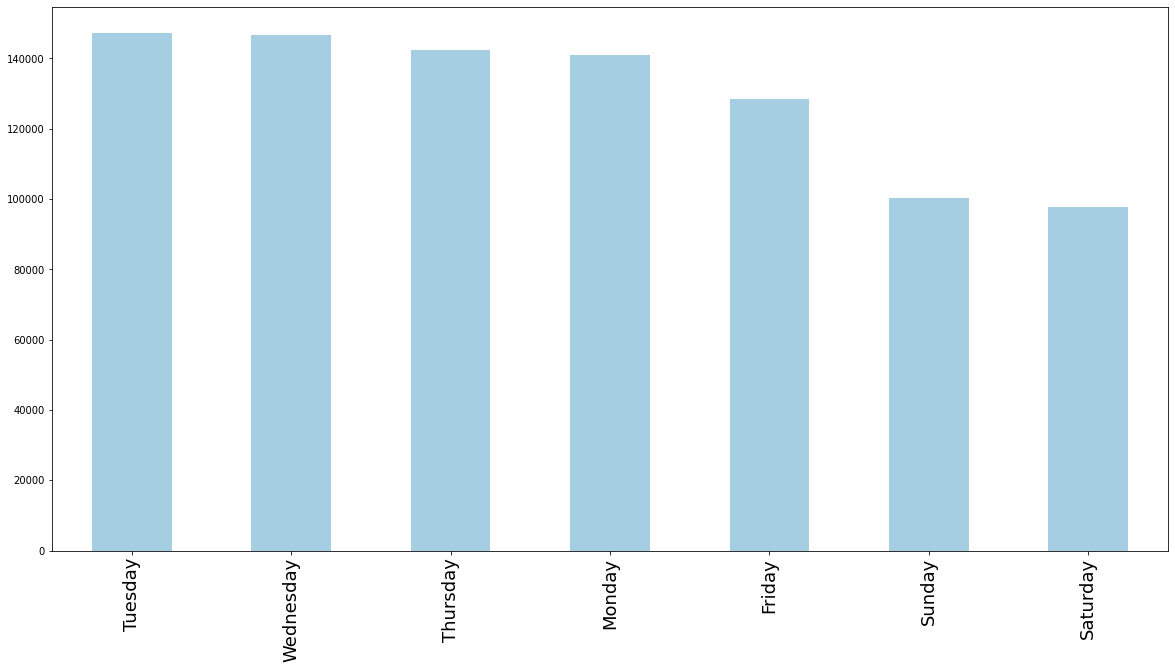

In [99]:
data = df['day_of_week'].value_counts()
plt.figure(figsize=(20,10))
res = data.plot(colormap='Paired',kind='bar')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res

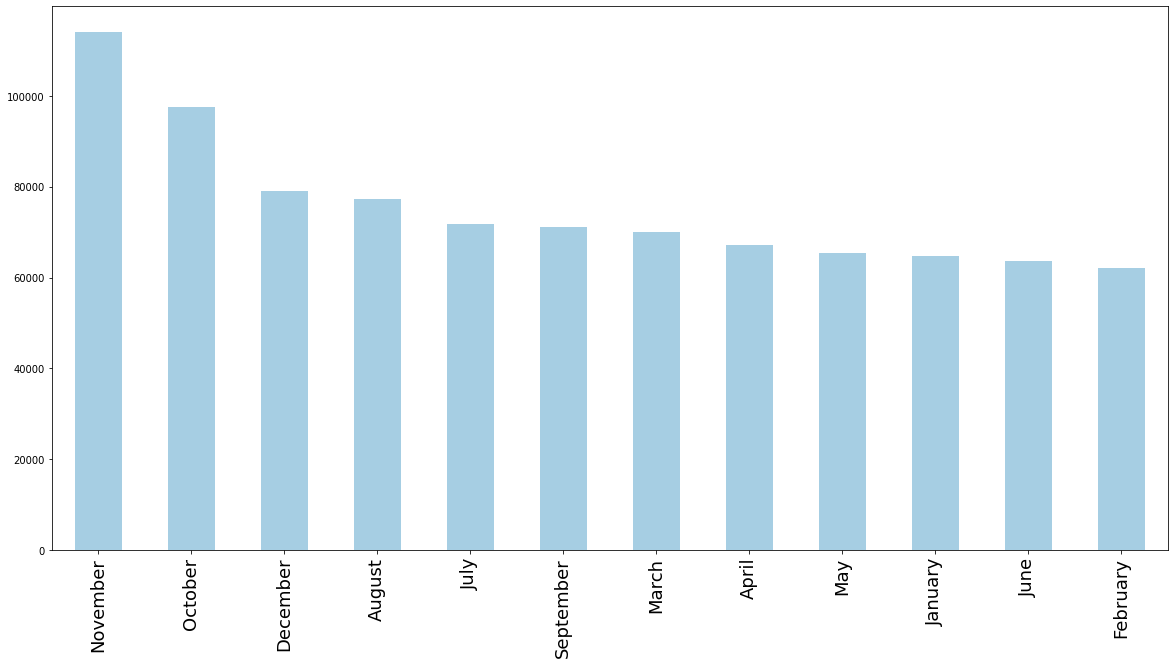

In [73]:
data = df['month'].value_counts()
plt.figure(figsize=(20,10))
res = data.plot(colormap='Paired',kind='bar')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res

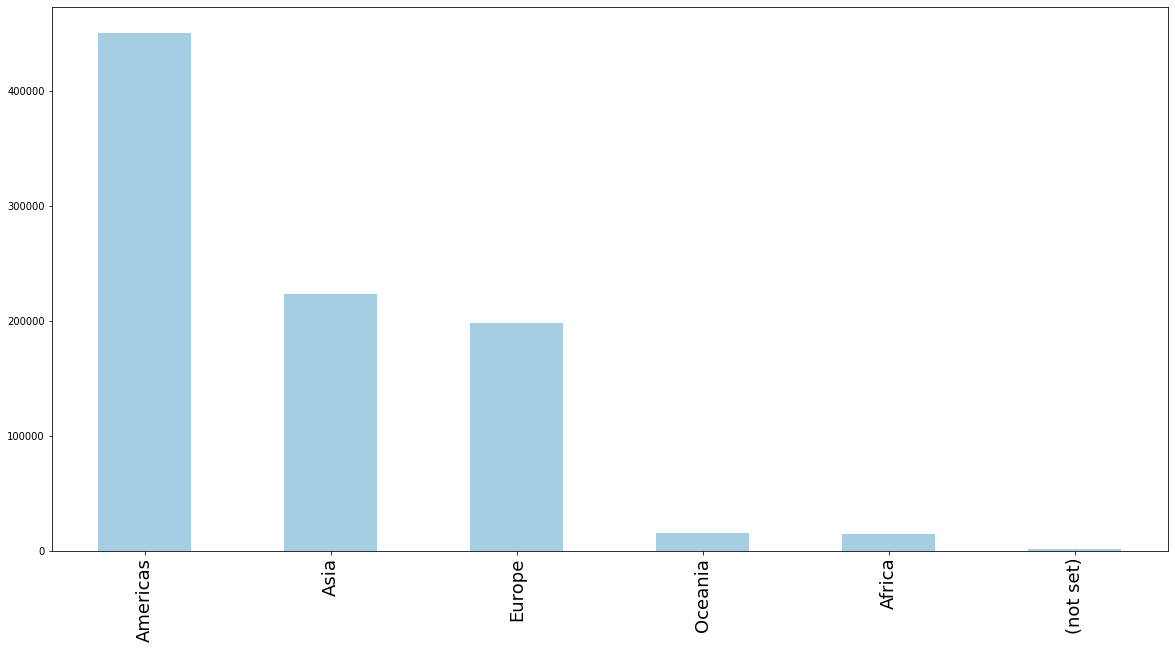

In [69]:
data = df['continent'].value_counts()
plt.figure(figsize=(20,10))
res = data.plot(colormap='Paired',kind='bar')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res

# Data Cleaning

In [6]:
df['transactionRevenue'].fillna(0, inplace=True)

In [6]:
df.isnull().sum()

channelGrouping                   0
date                              0
fullVisitorId                     0
sessionId                         0
socialEngagementType              0
visitId                           0
visitNumber                       0
visitStartTime                    0
datasplit                         0
campaign                          0
source                            0
medium                            0
keyword                      502929
isTrueDirect                 629648
referralPath                 572712
adContent                    892707
visits                            0
hits                              0
pageviews                       100
bounces                      453023
newVisits                    200593
transactionRevenue                0
continent                         0
subContinent                      0
country                           0
region                            0
metro                             0
city                        

In [7]:
dfnull = df.isnull().sum().reset_index(name='count').sort_values(by=['count'],ascending=False)

In [8]:
dfnull["count in %"] = round((dfnull["count"] *100)/df.shape[0], 1)

In [9]:
dfnull[dfnull["count in %"] > 0]

,index,count,count in %
15,adContent,892707,98.8
51,slot,882193,97.6
50,page,882193,97.6
54,isVideoAd,882193,97.6
53,adNetworkType,882193,97.6
52,gclId,882092,97.6
13,isTrueDirect,629648,69.7
14,referralPath,572712,63.4
12,keyword,502929,55.7
19,bounces,453023,50.1


In [10]:
dfnull[dfnull["count in %"] > 50]['index'].tolist()

['adContent',
 'slot',
 'page',
 'isVideoAd',
 'adNetworkType',
 'gclId',
 'isTrueDirect',
 'referralPath',
 'keyword',
 'bounces']

In [11]:
columnsToDrop = dfnull[dfnull["count in %"] > 50]['index'].tolist()

In [12]:
df.drop(columnsToDrop,1, inplace=True)

In [13]:
df.drop(['date'],1, inplace=True)

In [14]:
df.shape

(903653, 44)

In [15]:
columns = df.columns
columnOneValue = []
for c in columns:
    if len(df[c].unique()) < 2:
        columnOneValue.append(c)
        print(c,df[c].unique())

socialEngagementType ['Not Socially Engaged']
datasplit ['train']
visits [1]
cityId ['not available in demo dataset']
latitude ['not available in demo dataset']
longitude ['not available in demo dataset']
networkLocation ['not available in demo dataset']
browserVersion ['not available in demo dataset']
browserSize ['not available in demo dataset']
operatingSystemVersion ['not available in demo dataset']
mobileDeviceBranding ['not available in demo dataset']
mobileDeviceModel ['not available in demo dataset']
mobileInputSelector ['not available in demo dataset']
mobileDeviceInfo ['not available in demo dataset']
mobileDeviceMarketingName ['not available in demo dataset']
flashVersion ['not available in demo dataset']
language ['not available in demo dataset']
screenColors ['not available in demo dataset']
screenResolution ['not available in demo dataset']
criteriaParameters ['not available in demo dataset']


In [16]:
df.drop(columnOneValue,1, inplace=True)

In [21]:
df.isnull().sum()

channelGrouping            0
fullVisitorId              0
sessionId                  0
visitId                    0
visitNumber                0
visitStartTime             0
campaign                   0
source                     0
medium                     0
hits                       0
pageviews                100
newVisits             200593
transactionRevenue         0
continent                  0
subContinent               0
country                    0
region                     0
metro                      0
city                       0
networkDomain              0
browser                    0
operatingSystem            0
isMobile                   0
deviceCategory             0
dtype: int64

In [17]:
df['pageviews'].fillna(df['pageviews'].value_counts().index[0], inplace=True)
df['newVisits'].fillna(0, inplace=True)

In [43]:
columns = df.columns
columnOneValue = []
for c in columns:
    if len(df[c].unique()) > 1:
        columnOneValue.append(c)
        print(c,df[c].unique())

channelGrouping ['Organic Search' 'Referral' 'Paid Search' 'Affiliates' 'Direct' 'Display'
 'Social' '(Other)']
visitNumber [  1   2   3   5  11   4  57   6  56   7  20   8  15   9  25  24  14  89
 136  13  85  10 105  22  21  48  18  26  17  83  38  84  27  42 100  31
  16  30  59  50  19  51  29 160  52  12  63  23  47  49  28  34 178  88
  33 317  93 140  35  41  91  92  74 309  43  61  46  45  32 108  86 195
  36 236  72 162 235  90  76  77  94  96  73  78  97  87 304 106 107 389
  68  98 132  58 266 267 221  39 121 143 142 174 175 189 191  55 190 104
 245 204  37  82 137 206 101  62 110 156 158 157 159 138 109 194 193 147
 254  71  53 144 145 146  80 253  99 134 135 102  44 130  95  75 103 315
  70  69 117 163 154 153 283  65 262 263 295 297 298 219  64 296 155 141
 169 170  60 207  54 187 133 118 264  67  66 126  40 122 325 326 197 167
 196 188 279 185 230 161 186 278 139 234 233 168 115 114 119 150 149 148
  79 306 123 131 171 124 129 258 112 218 183 199 261 259 260 200 220 152


subContinent ['Western Asia' 'Australasia' 'Southern Europe' 'Southeast Asia'
 'Northern Europe' 'Southern Asia' 'Western Europe' 'South America'
 'Eastern Asia' 'Eastern Europe' 'Northern America' 'Western Africa'
 'Central America' 'Eastern Africa' '(not set)' 'Caribbean'
 'Southern Africa' 'Northern Africa' 'Central Asia' 'Middle Africa'
 'Melanesia' 'Micronesian Region' 'Polynesia']
country ['Turkey' 'Australia' 'Spain' 'Indonesia' 'United Kingdom' 'Italy'
 'Pakistan' 'Austria' 'Netherlands' 'India' 'France' 'Brazil' 'China'
 'Singapore' 'Argentina' 'Poland' 'Germany' 'Canada' 'Thailand' 'Hungary'
 'Malaysia' 'Denmark' 'Taiwan' 'Russia' 'Nigeria' 'Belgium' 'South Korea'
 'Chile' 'Ireland' 'Philippines' 'Greece' 'Mexico' 'Montenegro'
 'United States' 'Bangladesh' 'Japan' 'Slovenia' 'Czechia' 'Sweden'
 'United Arab Emirates' 'Switzerland' 'Portugal' 'Peru' 'Hong Kong'
 'Vietnam' 'Sri Lanka' 'Serbia' 'Norway' 'Romania' 'Kenya' 'Ukraine'
 'Israel' 'Slovakia' '(not set)' 'Lithuania' 'Pu

In [41]:
df['isMobile'] = df['isMobile'].astype(int)

In [20]:
df.drop(['fullVisitorId','sessionId','visitId','campaign','city','metro','region',
         'networkDomain'],1,inplace=True)

In [26]:
df.dtypes

channelGrouping        object
visitNumber             int64
visitStartTime          int64
source                 object
medium                 object
hits                    int64
pageviews             float64
newVisits             float64
transactionRevenue    float64
continent              object
subContinent           object
country                object
browser                object
operatingSystem        object
isMobile                int64
deviceCategory         object
dtype: object

In [21]:
def createDummies(columns,df):
    newDf = pd.get_dummies(df[columns[0]], prefix=columns[0])
    for column in columns[1:]:
        newDf = pd.concat([newDf,pd.get_dummies(df[column], prefix=column)],axis=1, join="inner")
    return newDf

In [44]:
newDf = createDummies(['channelGrouping','medium','continent','country'
                       ,'browser','operatingSystem','deviceCategory'],df)

In [45]:
set(df.columns) - set(['channelGrouping','source','continent','country'
                       ,'browser','operatingSystem','deviceCategory'])

{'hits',
 'isMobile',
 'medium',
 'newVisits',
 'pageviews',
 'subContinent',
 'transactionRevenue',
 'visitNumber',
 'visitStartTime'}

In [46]:
dfClean = pd.concat([df[['hits','isMobile','newVisits','pageviews',
                         'transactionRevenue','visitNumber','visitStartTime']],newDf],axis=1, join="inner")

In [47]:
dfClean.shape

(903653, 327)

In [48]:
Xcolumns = list(set(dfClean.columns)- set(['transactionRevenue','isMobile','newVisits']))

In [49]:
Xcolumns

['country_Romania',
 'channelGrouping_Affiliates',
 'country_South Korea',
 'country_Bahamas',
 'country_Cameroon',
 'country_Sierra Leone',
 'country_Liechtenstein',
 'country_Bahrain',
 'country_Fiji',
 'country_Madagascar',
 'country_Djibouti',
 'country_Mongolia',
 'browser_TCL P500M',
 'browser_0',
 'operatingSystem_Windows',
 'country_Liberia',
 'country_New Caledonia',
 'country_Malta',
 'country_St. Kitts & Nevis',
 'browser_Nokia Browser',
 'browser_Puffin',
 'country_Martinique',
 'continent_Oceania',
 'operatingSystem_Nintendo Wii',
 'country_Bolivia',
 'country_Slovakia',
 'country_French Polynesia',
 'country_Myanmar (Burma)',
 'browser_Opera',
 'country_Taiwan',
 'country_Timor-Leste',
 'country_Bhutan',
 'country_United States',
 'browser_Changa 99695759',
 'country_Egypt',
 'country_Bulgaria',
 'country_Qatar',
 'country_Uruguay',
 'country_New Zealand',
 'country_Zimbabwe',
 'country_Afghanistan',
 'country_Åland Islands',
 'country_Algeria',
 'country_Italy',
 'browse

In [50]:
df1Corr=pd.DataFrame(df[['hits','isMobile','newVisits','pageviews',
                         'transactionRevenue','visitNumber','visitStartTime']].corr().unstack().sort_values(ascending=False)['transactionRevenue'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
transactionRevenue,1.000000
pageviews,0.155590
hits,0.154333
visitNumber,0.051366
visitStartTime,0.002724
isMobile,-0.016555
newVisits,-0.041164


# Modèles

## Random Forest



In [51]:
nbRow = 100000
X=dfClean[Xcolumns][:nbRow]
y=np.ravel(dfClean[['transactionRevenue']][:nbRow])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1) 
clf.fit(X, y)
clf_pred = clf.predict(X_test) 
clf_score = clf.score(X_test,y_test)
clf_score

1.0

In [58]:
liste_models = ['RandomForestClassifier']
liste_scores = [0.995431]

## Linear Regression



In [54]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression(fit_intercept=True)
linearReg.fit(X_train, y_train)
linearReg_pred = linearReg.predict(X_test)
linearReg_score = linearReg.score(X_test,y_test)
linearReg_score

-164.56112012301767

In [82]:
liste_models.append('LinearRegression')
liste_scores.append(linearReg_score)

## Simple Tree



In [55]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state=1) 
simple_tree.fit(X_train, y_train)
simple_tree_pred = simple_tree.predict(X_test)
simple_tree_score = simple_tree.score(X_test,y_test)
simple_tree_score

-2.3897675618418863

In [84]:
liste_models.append('DecisionTreeRegressor')
liste_scores.append(simple_tree_score)

## Bagging

In [56]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(random_state=1)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_score = bagging.score(X_test,y_test)
bagging_score

-0.437020193641948

In [86]:
liste_models.append('BaggingRegressor')
liste_scores.append(bagging_score)

## Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state=1)
boosting.fit(X_train, y_train)
boosting_pred = boosting.predict(X_test)
boosting_score = boosting.score(X_test,y_test) 
boosting_score

KeyboardInterrupt: 

In [88]:
liste_models.append('GradientBoostingClassifier')
liste_scores.append(boosting_score)

##  KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
knn_score

-0.06297977560158641

In [90]:
liste_models.append('KNeighborsRegressor')
liste_scores.append(knn_score)

In [59]:
perf = pd.DataFrame(liste_scores,liste_models , ['Scores'])
perf.sort_values(by='Scores', ascending=False)

,Scores
RandomForestClassifier,0.995431
